# 6.5 Cary Machine Learning: Clustering

## Contents:

01. Install Libraries
02. Import Libraries
03. Import Datasets
04. Data Cleaning & Manipulations
       - Remove Categorical Variables
       - Standardize Data
05. Perform Clustering
       - Use Elbow Technique for Easier Clustering
       - Run the k-means Algorithm
       - Create Column w/ Resulting Clusters
       - Create Visuals Plotting Different Variables
       - Discuss How & Why Clustering Makes Sense
       - Calculate Descriptive Statistics
       - Notes on Future Steps
06. Export Datasets

# 01. Install Libraries

In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


# 02. Import Libraries

In [6]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from datetime import datetime

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 03. Import Datasets

In [9]:
# Defines path as intro file path for Cary Real Estate project

path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Cary Real Estate Analysis'

In [10]:
# Imports cary_cleaned / wrangled / grouped dataset

df = pd.read_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'cary_grouped.parquet'))

In [11]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

In [12]:
df.shape

(278468, 25)

# 04. Data Cleaning & Manipulations

### 1. Remove Categorical Variables

In [15]:
df.shape

(278468, 25)

In [16]:
# Drop the missing "yearbuilt" rows

df_2 = df.dropna(subset=['yearbuilt'])

In [17]:
# Convert years built to just year format

df_2['yearbuilt'] = df_2['yearbuilt'].dt.year

/tmp/ipykernel_218/2919876563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['yearbuilt'] = df_2['yearbuilt'].dt.year


In [18]:
# Create a new column that shows property age based on current year

current_year = 2025
df_2['ageproperty'] = current_year - df_2['yearbuilt']

/tmp/ipykernel_218/3910477307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['ageproperty'] = current_year - df_2['yearbuilt']


In [19]:
df_2.isna().sum()

location                0
deedacres               0
landclass               0
totalstructures         0
totalunits              0
propertydesc           17
bldgvalue               0
landvalue               0
landsalevalue           0
landsaledate       115873
totalsalevalue          0
totalsaledate       12953
county                  0
totalbldgsqft         267
phycity                 0
phyzip                  0
shape_starea            0
shape_stlength          0
yearbuilt               0
geo_shape               0
geo_point_2d            0
latitude                0
longitude               0
landgroup               0
calcvalue               0
ageproperty             0
dtype: int64

In [20]:
# Remove rows with no value for "totalbldgsqft" and create new subset

df_3 = df_2.dropna(subset=['totalbldgsqft'])
df_3.head(3)

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude,landgroup,calcvalue,ageproperty
3972,1018 Starita Ct,0.63,Residential Less Than 10 Acres,1.0,1.0,LO167 WOODRIDGE SUB PH1 BM1997 -1764,291877,198000,27800,1997-10-28,157500,1998-07-01,Wake,1803,White Oak,27502,27754.638407,776.544420,1998,b'\x01\x03\x00\x00\x00\x01\x00\x00\x006\x00\x0...,b'\x01\x01\x00\x00\x00sE\x8a\x85\n\xbaS\xc0j\x...,35.731228,-78.906892,Residential,489877,27
3973,106 Castlebury Creek Ct,0.20,Residential Less Than 10 Acres,1.0,1.0,LO257 BROOKSTONE SUB PH11 BM1997 -1529,447604,210000,32429,1997-10-28,221000,1998-02-10,Wake,2993,White Oak,27519,9172.036502,394.961741,1998,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0e\x00...,b'\x01\x01\x00\x00\x00\xc0\xce\xbe\xf7\x94\xb7...,35.774673,-78.868467,Residential,657604,27
3974,105 Parkbow Ct,0.21,Residential Less Than 10 Acres,1.0,1.0,LO206 PARKGATE SUB PH2 SE1 BM1993 -669,452757,230000,36000,1993-06-23,217000,1995-12-04,Wake,2485,White Oak,27519,9129.447718,387.192224,1993,"b'\x01\x03\x00\x00\x00\x01\x00\x00\x00""\x00\x0...",b'\x01\x01\x00\x00\x00\xa6\n\t\xf2r\xb7S\xc0\x...,35.779007,-78.866391,Residential,682757,32


In [21]:
# Create new subset with only numberic columns for evaluation

drop_cols = ['location', 'landclass', 'propertydesc', 'landsalevalue', 'landsaledate', 'totalsaledate', 'county', 'phycity', 'phyzip', 'shape_starea', 'shape_stlength', 'yearbuilt', 'geo_shape', 'geo_point_2d', 'latitude', 'longitude', 'landgroup']

df_4 = df_3.drop(drop_cols, axis = 1)

df_4.head(5)

,deedacres,totalstructures,totalunits,bldgvalue,landvalue,totalsalevalue,totalbldgsqft,calcvalue,ageproperty
3972,0.63,1.0,1.0,291877,198000,157500,1803,489877,27
3973,0.20,1.0,1.0,447604,210000,221000,2993,657604,27
3974,0.21,1.0,1.0,452757,230000,217000,2485,682757,32
3975,0.40,1.0,1.0,445471,210000,229500,2928,655471,24
3976,0.15,1.0,1.0,319578,220000,144500,2234,539578,28


In [22]:
df_4.shape

(192497, 9)

In [23]:
df_4.dtypes

deedacres          float64
totalstructures    float64
totalunits         float64
bldgvalue            Int64
landvalue            Int64
totalsalevalue       Int64
totalbldgsqft        Int64
calcvalue            int64
ageproperty          int32
dtype: object

### 2. Standardize Data

In [25]:
# Z-Score using pandas 
df_scaled = df_4.copy()
for column in df_4.columns:
    df_scaled[column] = (df_4[column] - df_4[column].min()) / (df_4[column].max() - df_4[column].min())

In [26]:
df_scaled

,deedacres,totalstructures,totalunits,bldgvalue,landvalue,totalsalevalue,totalbldgsqft,calcvalue,ageproperty
3972,0.000120,0.0,0.000526,0.000395,0.000269,0.000866,0.000293,0.000404,0.101887
3973,0.000038,0.0,0.000526,0.000606,0.000286,0.001216,0.000504,0.000542,0.101887
3974,0.000040,0.0,0.000526,0.000613,0.000313,0.001194,0.000414,0.000563,0.120755
3975,0.000076,0.0,0.000526,0.000603,0.000286,0.001262,0.000493,0.000541,0.090566
3976,0.000029,0.0,0.000526,0.000433,0.000299,0.000795,0.000369,0.000445,0.105660
...,...,...,...,...,...,...,...,...,...
292578,0.000040,0.0,0.000526,0.000448,0.00052,0.003933,0.000454,0.000590,0.377358
292579,0.000038,0.0,0.000526,0.000823,0.00015,0.004227,0.000501,0.000634,0.007547
292580,0.000053,0.0,0.000526,0.001159,0.000327,0.006449,0.000632,0.000967,0.007547
292581,0.000011,0.0,0.000526,0.000486,0.000143,0.002739,0.000368,0.000411,0.007547


# 05. Perform Clustering

### 1. Use Elbow Technique to Estimate Cluster Quantity

In [29]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [30]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of 

[-1161.8989330633726,
 -500.29380063085364,
 -286.1555915866853,
 -196.3878873370773,
 -152.9139461659428,
 -122.8813272155527,
 -98.91421162419675,
 -85.732915196068,
 -76.5666196719663]

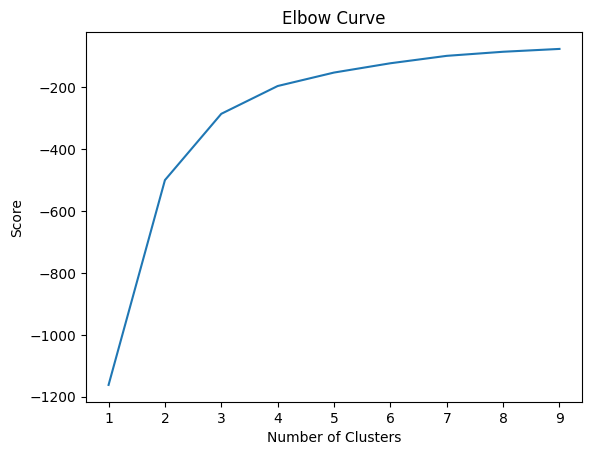

In [31]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The line appears to begin straightening out at 4 points, so the number of optimal amount of clusters will be 4.

### 2. Run the k-means Algorithm

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters=4, n_init=10)

In [35]:
# Fit the k-means object to the data.

df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

### 3. Create Column w/ Resulting Clusters

In [37]:
df_scaled

,deedacres,totalstructures,totalunits,bldgvalue,landvalue,totalsalevalue,totalbldgsqft,calcvalue,ageproperty,clusters
3972,0.000120,0.0,0.000526,0.000395,0.000269,0.000866,0.000293,0.000404,0.101887,0
3973,0.000038,0.0,0.000526,0.000606,0.000286,0.001216,0.000504,0.000542,0.101887,0
3974,0.000040,0.0,0.000526,0.000613,0.000313,0.001194,0.000414,0.000563,0.120755,0
3975,0.000076,0.0,0.000526,0.000603,0.000286,0.001262,0.000493,0.000541,0.090566,0
3976,0.000029,0.0,0.000526,0.000433,0.000299,0.000795,0.000369,0.000445,0.105660,0
...,...,...,...,...,...,...,...,...,...,...
292578,0.000040,0.0,0.000526,0.000448,0.00052,0.003933,0.000454,0.000590,0.377358,2
292579,0.000038,0.0,0.000526,0.000823,0.00015,0.004227,0.000501,0.000634,0.007547,3
292580,0.000053,0.0,0.000526,0.001159,0.000327,0.006449,0.000632,0.000967,0.007547,3
292581,0.000011,0.0,0.000526,0.000486,0.000143,0.002739,0.000368,0.000411,0.007547,3


In [38]:
df_scaled['clusters'].value_counts()

clusters
0    82623
3    58242
1    40052
2    11580
Name: count, dtype: int64

### 4. Create Visuals Plotting Different Variables Against Each Other 

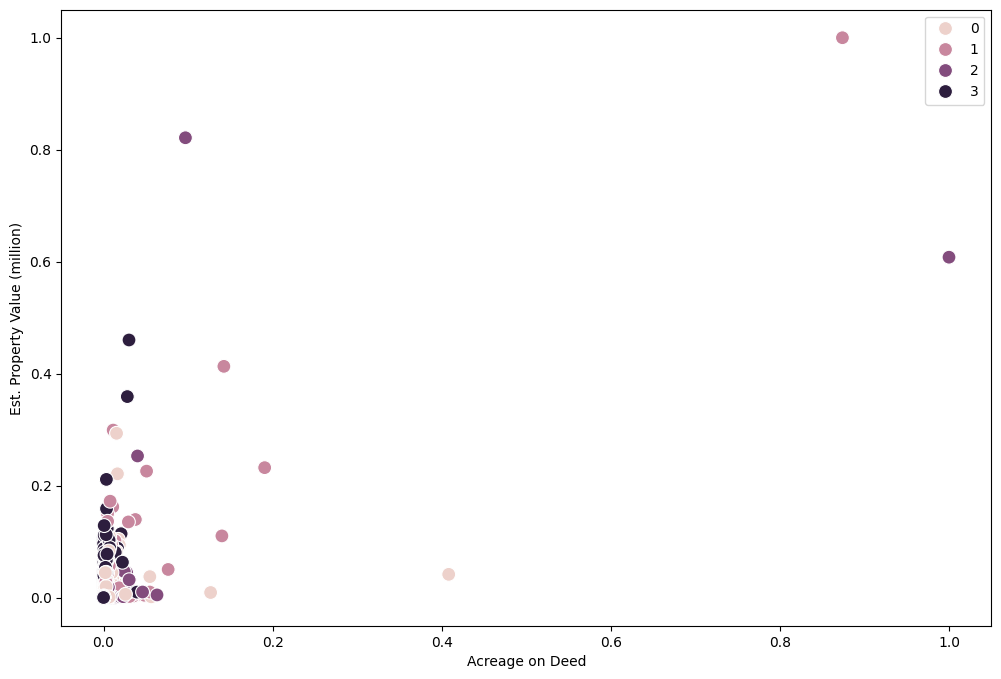

In [40]:
# Plot the clusters for the "calcvalue" and "deedacres" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['deedacres'], y=df_scaled['calcvalue'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Acreage on Deed') # Label x-axis.
plt.ylabel('Est. Property Value (million)') # Label y-axis.
plt.show()

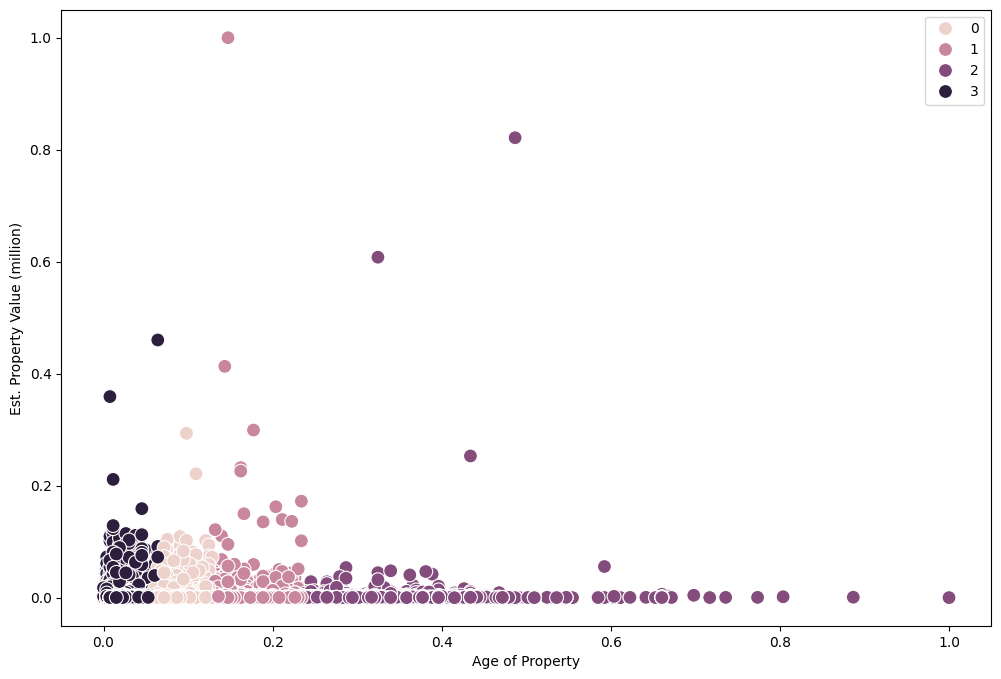

In [41]:
# Plot the clusters for the "calcvalue" and "ageproperty" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['ageproperty'], y=df_scaled['calcvalue'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Age of Property')
plt.ylabel('Est. Property Value (million)') 
plt.show()

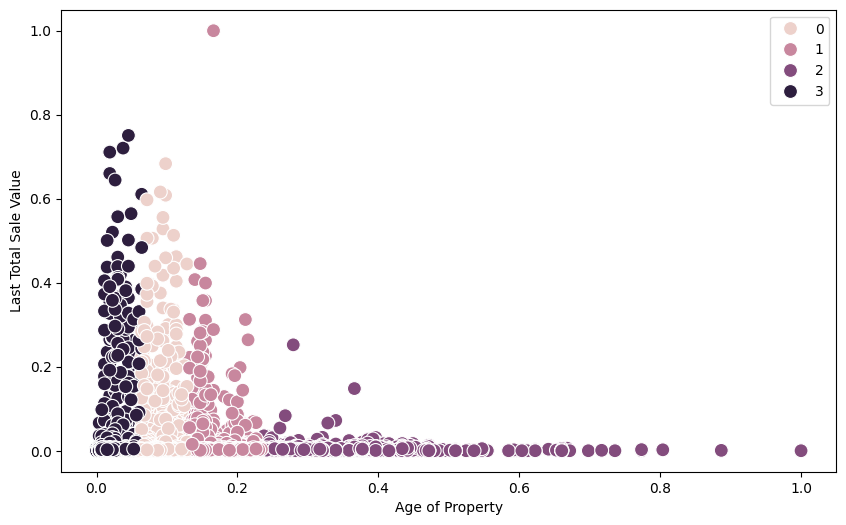

In [42]:
# Plot the clusters for the "totalsalevalue" and "ageproperty" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_scaled['ageproperty'], y=df_scaled['totalsalevalue'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Age of Property')
plt.ylabel('Last Total Sale Value') 
plt.show()

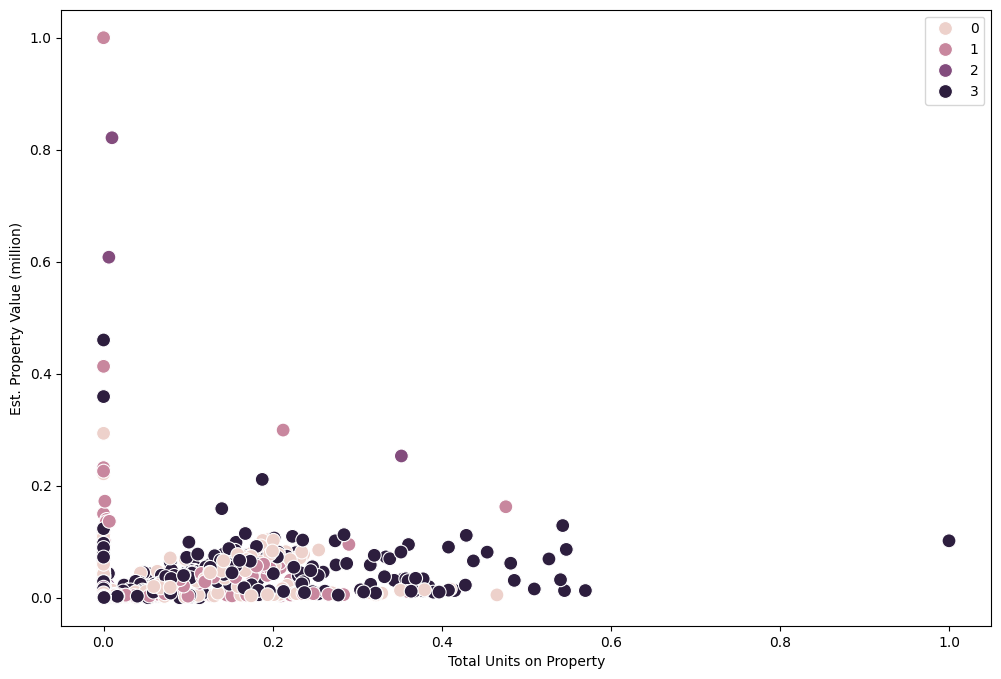

In [43]:
# Plot the clusters for the "calcvalue" and "totalunits" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['totalunits'], y=df_scaled['calcvalue'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Total Units on Property')
plt.ylabel('Est. Property Value (million)') 
plt.show()

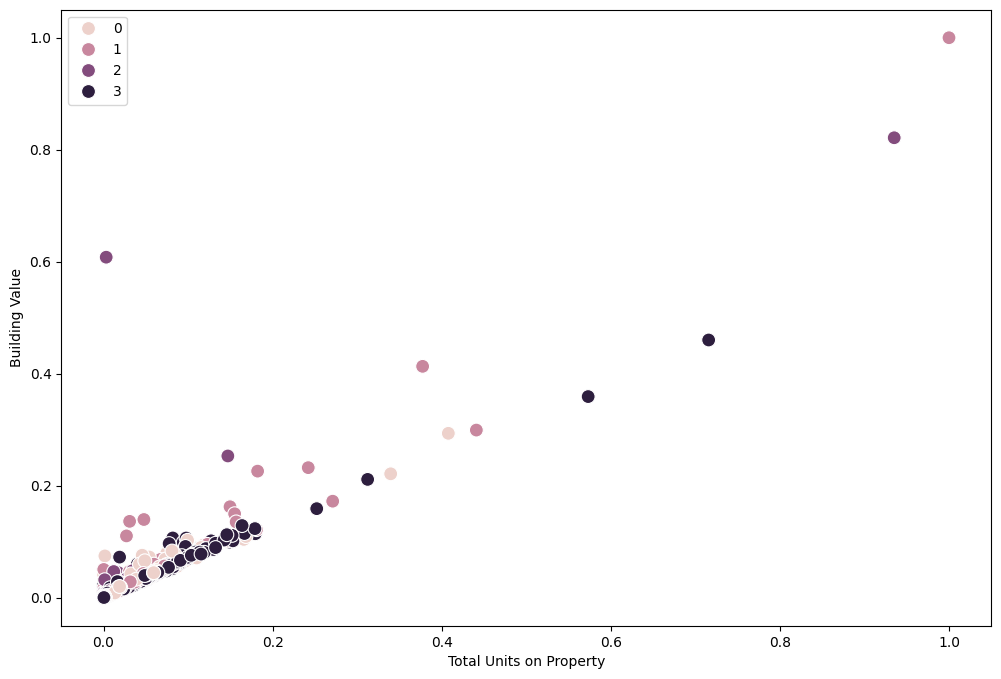

In [44]:
# Plot the clusters for the "calcvalue" and "bldgvalue" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['bldgvalue'], y=df_scaled['calcvalue'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Total Units on Property')
plt.ylabel('Building Value') 
plt.show()

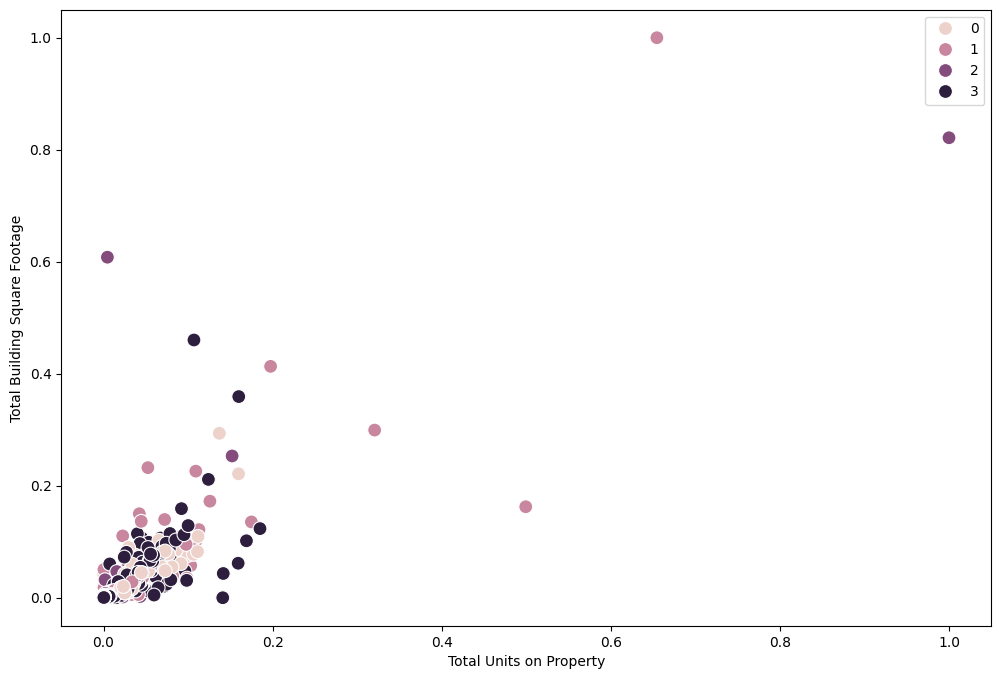

In [45]:
# Plot the clusters for the "calcvalue" and "totalbldgsqft" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['totalbldgsqft'], y=df_scaled['calcvalue'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Total Units on Property')
plt.ylabel('Total Building Square Footage') 
plt.show()

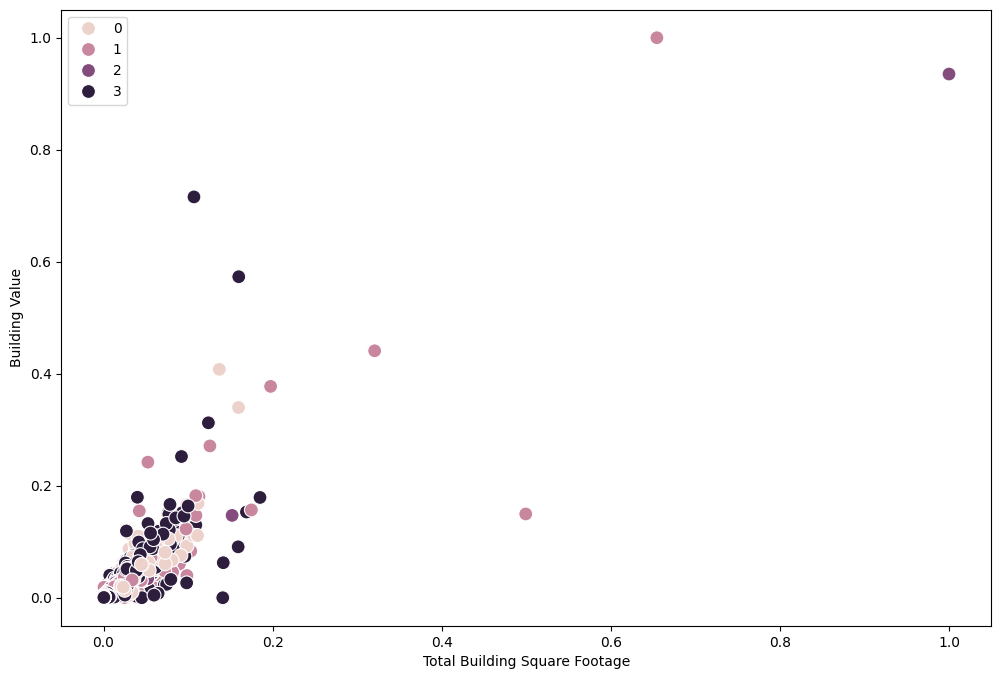

In [46]:
# Plot the clusters for the "totalbldgsqft" and "bldgvalue" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['totalbldgsqft'], y=df_scaled['bldgvalue'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Total Building Square Footage')
plt.ylabel('Building Value') 
plt.show()

### 5. Discuss How / Why Clusters Make Sense

Clusters are an interesting way to look at data--we might make our own assumptions about what the independent and dependent variables could be, but by leverage clusters, we can have possible correlated features pointed out to us. 

However, most of the clusters above don't seem to make the most sense. There could be some bias in the dating influencing this, but for the most part it's difficult to tell. Would increasing the amount of clusters to 4 have helped? 

The only cluster that seems to indicate a sort of pattern is the Estimated Property Value by the Age of the Property. This is a relationship that could be further explored.

### 6. Calculate Descriptive Statistics

In [49]:
# Concatenate the two DataFrames along the columns (axis=1)
df_combined = pd.concat([df_4, df_scaled['clusters']], axis=1)
df_combined.head()

,deedacres,totalstructures,totalunits,bldgvalue,landvalue,totalsalevalue,totalbldgsqft,calcvalue,ageproperty,clusters
3972,0.63,1.0,1.0,291877,198000,157500,1803,489877,27,0
3973,0.20,1.0,1.0,447604,210000,221000,2993,657604,27,0
3974,0.21,1.0,1.0,452757,230000,217000,2485,682757,32,0
3975,0.40,1.0,1.0,445471,210000,229500,2928,655471,24,0
3976,0.15,1.0,1.0,319578,220000,144500,2234,539578,28,0


In [50]:
df_combined.groupby('clusters').agg({'deedacres':['mean', 'median'], 
                         'totalbldgsqft':['mean', 'median'], 
                         'calcvalue':['mean', 'median'],
                          'ageproperty':['mean', 'median'],
                                    'totalsalevalue': ['mean', 'median']})

deedacres        totalbldgsqft             calcvalue            \
              mean median          mean  median          mean    median   
clusters                                                                  
0         0.611282   0.25    3634.68838  2375.0  8.367227e+05  537320.0   
1         1.152688   0.40   3823.291047  1980.0  8.471003e+05  470447.5   
2         1.988242   0.38   3384.555181  1781.0  9.802350e+05  514859.5   
3         0.400602   0.17   4326.039336  2704.0  1.029377e+06  612657.0   

         ageproperty        totalsalevalue            
                mean median           mean    median  
clusters                                              
0          24.507389   24.0  430427.113237  289500.0  
1          44.508913   42.0  337020.429641  189000.0  
2          80.103195   75.0  263159.424266  149000.0  
3           7.411936    7.0  574274.155369  429000.0

In [51]:
df_combined.shape

(192497, 10)

## Notes on Descriptive Stats Findings:

Last Total Sale value:

1. Newer Properties (cluster 2)
   - Age Median: 7 years
   - Value Median: 424,500 dollars
2. Mid Aged Properties (cluster 0)
   - Age Median: 25 years
   - Value Median: 288,500 dollars
3. Older Properties (cluster 3)
   - Age Median: 42 years
   - Value Median: 190,000 dollars
4. Oldest Properties (cluster 1)
   - Age Median: 74 years
   - Value Median: 148,000 dollars

Estimated Property Value:

1. Newer Properties (cluster 2)
   - Age Median: 7.7 years
   - Value Median: 610,440 dollars
2. Mid Aged Properties (cluster 0)
   - Age Median: 25 years
   - Value Median: 537,480 dollars
3. Older Properties (cluster 3)
   - Age Median: 42 years
   - Value Median: 470,769 dollars
4. Oldest Properties (cluster 1)
   - Age Median: 74 years
   - Value Median: $508,810 dollars
  
The Total Sale Value appears to climb down in value the older the property is. When looking at the derived column of "calcvalue", the numbers appear to follow the same pattern, but not as steep, and even climbs up slightly for the oldest properties.

### 7. Notes on Future Steps

The clustering was helpful in indicating relationships in the data that I wasn't paying attention to. It seems somewhat of a fair assumption that newer properties would cost more, but it's nice that these visuals and stats quantify this.

That being said, this was a look at all variables with different land class properties combined (i.g. commercial and residential). So it would be interesting to explore this again with the data broken out by these groups.

Another thing to note is that this is only evaluating about a third of the original data set as any missing rows for property "yearbuilt" were eliminated. It would nice to add find the missing data for this to keep more information on the dataset.

In terms of a pipeline, I feel like this could have been useful more at the beginning of the analysis after data was initially cleaned /wrangled to help indicate features to expore, but perhaps it can be implemented in different parts of the process.

### 9. Correlation Matrix w/ Property Age

In [55]:
# Concatenate the two DataFrames along the columns (axis=1)
df_combined_total = pd.concat([df_3, df_scaled['clusters']], axis=1)
df_combined_total.head(1)

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude,landgroup,calcvalue,ageproperty,clusters
3972,1018 Starita Ct,0.63,Residential Less Than 10 Acres,1.0,1.0,LO167 WOODRIDGE SUB PH1 BM1997 -1764,291877,198000,27800,1997-10-28,157500,1998-07-01,Wake,1803,White Oak,27502,27754.638407,776.54442,1998,b'\x01\x03\x00\x00\x00\x01\x00\x00\x006\x00\x0...,b'\x01\x01\x00\x00\x00sE\x8a\x85\n\xbaS\xc0j\x...,35.731228,-78.906892,Residential,489877,27,0


In [56]:
# Create a subset of columns to perform correlation matrix on
corr_cols = df_combined_total[['bldgvalue', 'landvalue', 'landsalevalue', 'totalsalevalue', 'totalbldgsqft', 'ageproperty']]

In [57]:
# Apply the corr() method to the selected columns
corr_matrix = corr_cols.corr()
corr_matrix

,bldgvalue,landvalue,landsalevalue,totalsalevalue,totalbldgsqft,ageproperty
bldgvalue,1.000000,0.533372,0.228321,0.411178,0.877871,-0.024926
landvalue,0.533372,1.000000,0.136307,0.168115,0.558796,0.041932
landsalevalue,0.228321,0.136307,1.000000,0.207176,0.209923,-0.068105
totalsalevalue,0.411178,0.168115,0.207176,1.000000,0.393924,-0.042760
totalbldgsqft,0.877871,0.558796,0.209923,0.393924,1.000000,-0.004329
ageproperty,-0.024926,0.041932,-0.068105,-0.042760,-0.004329,1.000000


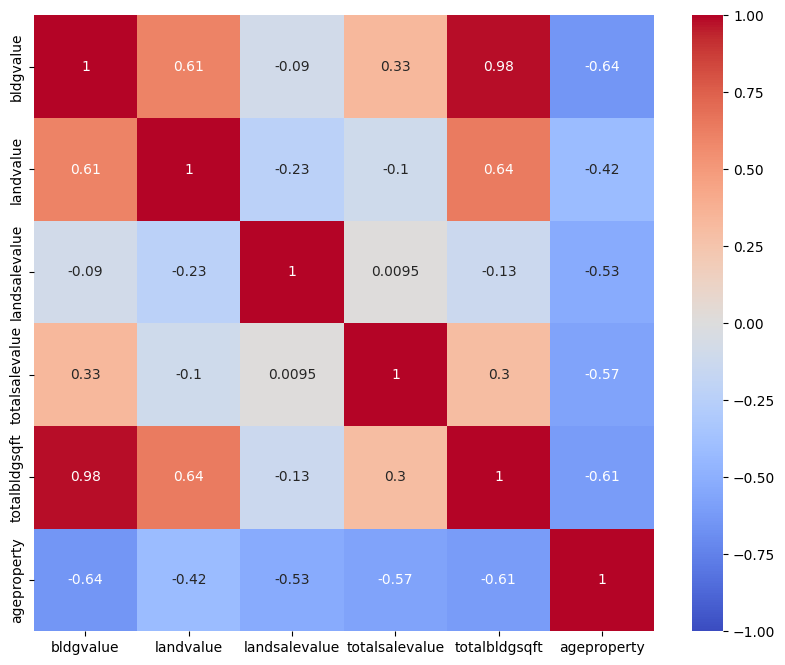

In [58]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(corr_matrix.corr(), annot = True,  cmap='coolwarm', vmin=-1, vmax=1, center=0,ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# 06. Export Datasets

In [60]:
#### Export cleaned df_combined_total into the Prepared Data folder

df_combined_total.to_parquet(os.path.join(path, '01 Datasets','02 Prepared Data', 'cary_clusters.parquet'), compression = 'snappy')

In [61]:
#### Export df_combined as .csv
df_combined_total.to_csv(os.path.join(path, '01 Datasets', '02 Prepared Data', 'cary_clusters.csv'))